In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing de la data

### Import de la data

In [3]:
file_name = 'consommation-quotidienne-brute-regionale.csv'  # 'consommation-quotidienne-brute.csv'

df_original = pd.read_csv(file_name, sep=';')

### Trier par date et heure croissant

In [4]:
df_filtered = df_original.sort_values(by=['Date', 'Heure'])

### Drop des colomnes inutiles

In [5]:
df_filtered = df_filtered.drop(
    [
        'Date - Heure',
        'Code INSEE région',
        'Statut - GRTgaz',
        'Statut - Teréga',
        'Statut - RTE'
    ],
    axis=1
)

### Drop des champs NAN

In [6]:
df_filtered = df_filtered.dropna(subset='Consommation brute totale (MW)')

### Convertion au format datetime

In [7]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Copules

In [8]:
import seaborn as sns
from statsmodels.tsa.seasonal import STL

### Région Hauts-de-France

In [18]:
df_hdf = df_filtered.loc[df_filtered['Région'] == 'Hauts-de-France']

In [ ]:
# daily et que conso totale
df_hdf_totale = df_hdf[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_hdf_totale = df_hdf_totale.groupby(['Date']).sum()
df_hdf_totale = df_hdf_totale['Consommation brute totale (MW)']
df_hdf_totale.sort_index(inplace=True)
df_hdf_totale.head(10)

Date
2013-01-01    262489.0
2013-01-02    402276.0
2013-01-03    398693.0
2013-01-04    397170.0
2013-01-05    374701.0
2013-01-06    358514.0
2013-01-07    415545.0
2013-01-08    451647.0
2013-01-09    464991.0
2013-01-10    453121.0
Name: Consommation brute totale (MW), dtype: float64

### Région Île-de-France

In [20]:
df_idf = df_filtered.loc[df_filtered['Région'] == 'Île-de-France']

In [21]:
# daily et que conso totale
df_idf_totale = df_idf[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_idf_totale = df_idf_totale.groupby(['Date']).sum()
df_idf_totale = df_idf_totale['Consommation brute totale (MW)']
df_idf_totale.sort_index(inplace=True)
df_idf_totale.head(10)

Date
2013-01-01    208420.0
2013-01-02    324636.0
2013-01-03    321196.0
2013-01-04    312121.0
2013-01-05    291643.0
2013-01-06    291589.0
2013-01-07    330374.0
2013-01-08    347680.0
2013-01-09    356805.0
2013-01-10    346686.0
Name: Consommation brute totale (MW), dtype: float64

## Donnée nuages de points

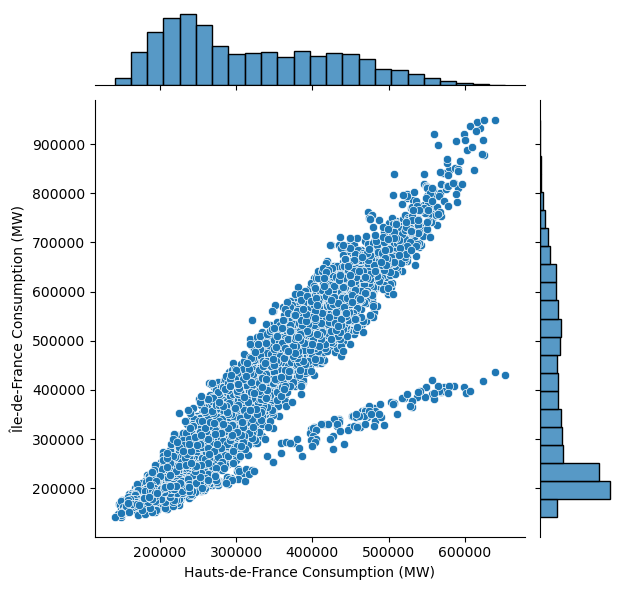

In [24]:
h = sns.jointplot(x=df_hdf_totale, y=df_idf_totale, kind="scatter")
h.set_axis_labels("Hauts-de-France Consumption (MW)","Île-de-France Consumption (MW)")